# Unit 12 -- Neural Network using Tensorflow

*Python Version*

In [1]:
import sys
print(sys.version)

*Import Libraries*  
**Tensorflow  
Pandas  
sklearn  
numpy  
keras**

In [2]:
import tensorflow as tf
#from tensorflow.keras import layers

from sklearn import datasets
import pandas as pd
import numpy as np
from tensorflow.keras import layers
print(tf.__version__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

2.0.0


## Load the Data
*Higgs Data*

In [3]:
df = pd.read_csv('HIGGS.csv', header=None)

In [4]:
# Verify size is as expected
print("{:>25}{:>10,} x {:,}\n".format("Shape of raw data is ", df.shape[0], df.shape[1]))

    Shape of raw data is 11,000,000 x 29



The size of the HIGGS.csv file contains 11,000,000 records and 29 featues. On the paper "Searching for Exotic Particles" they resample the data and used a 2.6 million records to do the training of the model and 100,000 samples to validate the model.
To start building the process we will take a sample of 50,000 records and 5000 for validation. Then we would increase the sample to the level used on the paper.

Column '0' is the target value the rest of the columns (1-28) the rest of the features.

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


**Select a sample of 50,000 for training**

In [6]:
nSamples=500000
train_set = df.sample(n=nSamples, random_state=99)

In [7]:
train_set.shape

(500000, 29)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

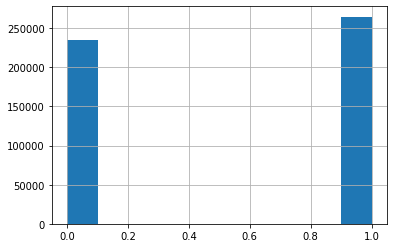

In [9]:
train_set[0].hist()
plt.show()

**Select a sample of 5,000 from the remaining data as validation**

In [10]:
test_set = df[~df.isin(train_set)].dropna().sample(n=50000, random_state=99)

In [11]:
test_set.shape

(50000, 29)

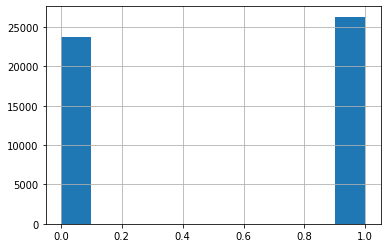

In [12]:
test_set[0].hist()
plt.show()

## Model

In [13]:
model = tf.keras.Sequential()

#Input Layer
model.add(layers.Dense(28, input_dim = 28))
# Hidden Layers
model.add(layers.Dense(300, activation = 'tanh'))
model.add(layers.Dense(300, activation = 'tanh'))
model.add(layers.Dense(300, activation = 'tanh'))
#outputLayer
model.add(layers.Dense(1, activation='sigmoid'))

## Compilation

In [14]:
# For a binary classification problem
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Training

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform( train_set.iloc[:, 1:])

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[12],scaler.min_[12]))
multiplied_by = scaler.scale_[12]
added = scaler.min_[12]

scaled_train_df = pd.DataFrame(scaled_train, columns =  train_set.iloc[:, 1:].columns.values)

Note: median values were scaled by multiplying by 0.4514933346 and adding 0.000000


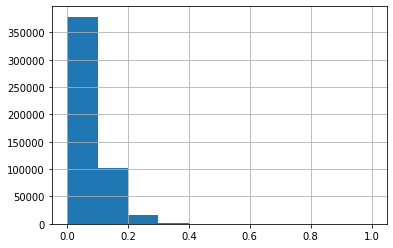

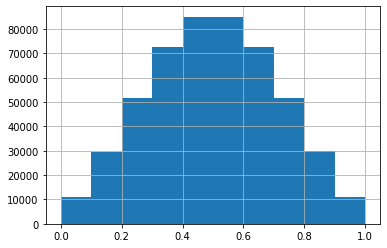

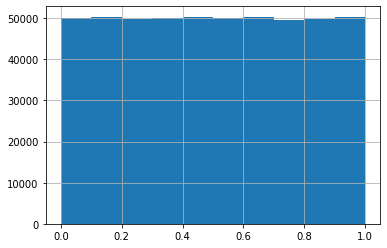

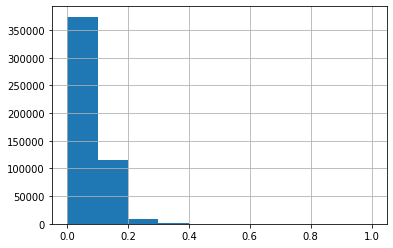

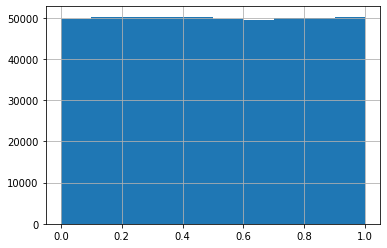

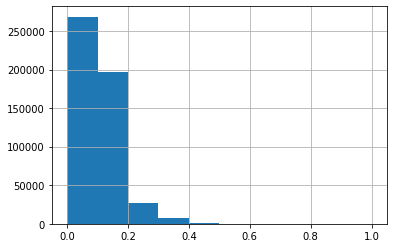

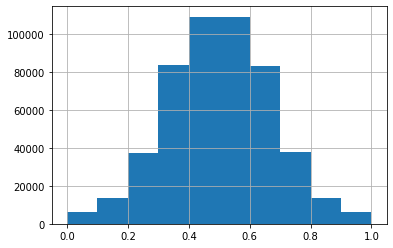

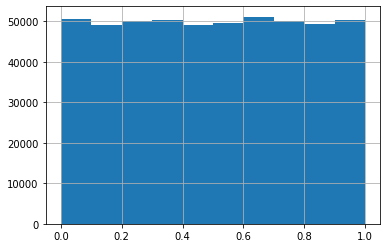

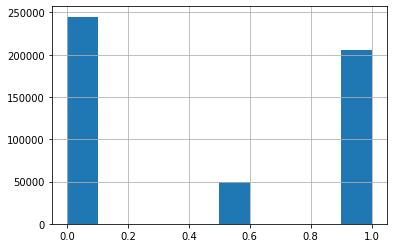

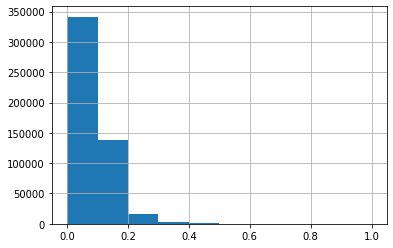

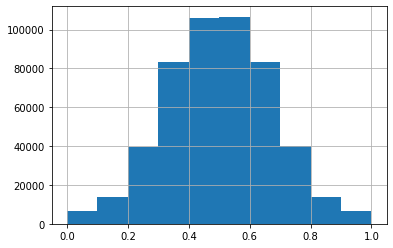

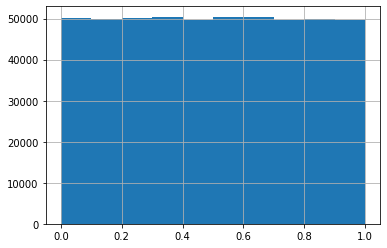

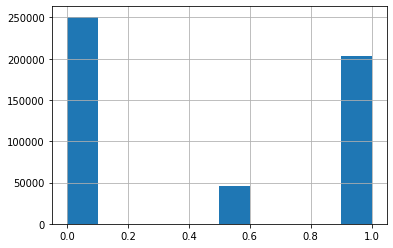

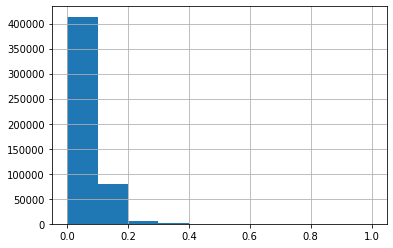

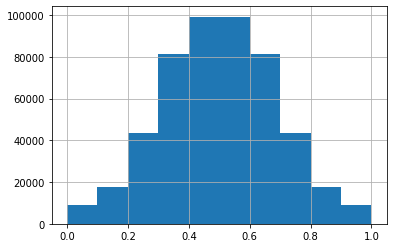

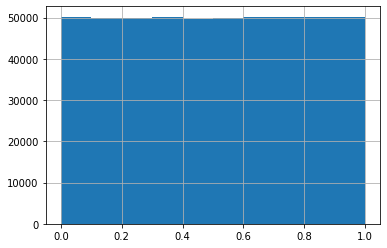

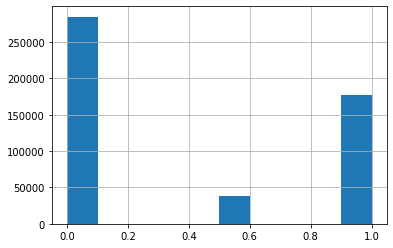

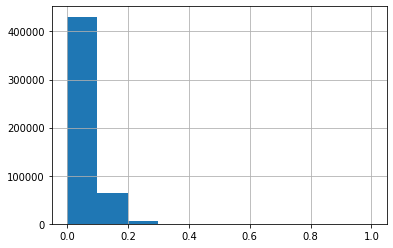

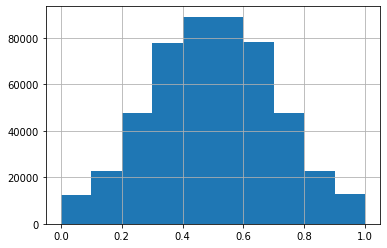

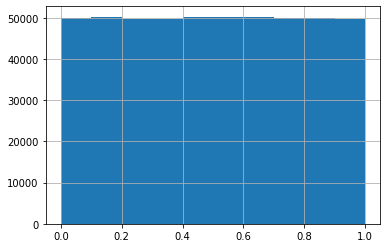

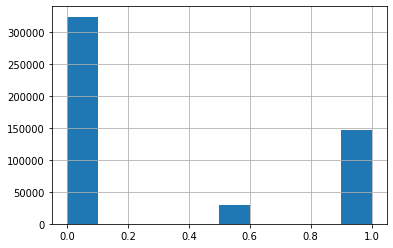

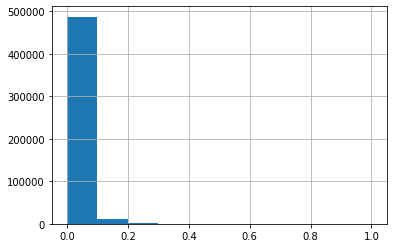

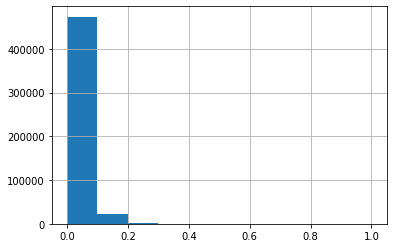

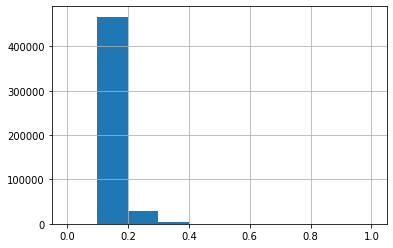

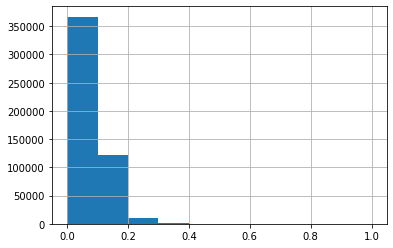

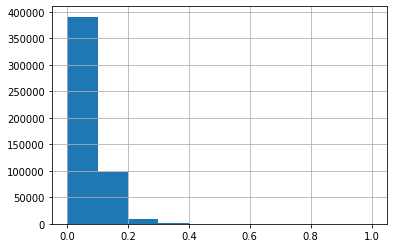

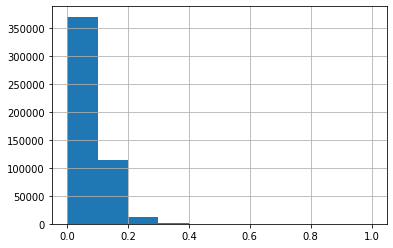

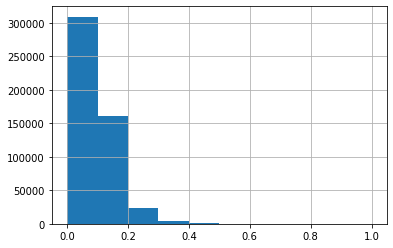

In [16]:
for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

In [17]:
X_train = scaled_train_df.values
Y_train = train_set.iloc[:, 0].values

In [18]:
X_train

array([[0.00570078, 0.7138    , 0.56018523, ..., 0.05591448, 0.13171565,
        0.21752973],
       [0.04230581, 0.64599999, 0.70360655, ..., 0.05310746, 0.07705583,
        0.08600733],
       [0.12447961, 0.66879999, 0.68354985, ..., 0.10186449, 0.10035701,
        0.15880375],
       ...,
       [0.0105202 , 0.05200002, 0.82856296, ..., 0.07465703, 0.05323631,
        0.05375624],
       [0.08453662, 0.01920002, 0.68370904, ..., 0.06308635, 0.08315559,
        0.08273984],
       [0.04127442, 0.65999999, 0.51991265, ..., 0.02308429, 0.05466851,
        0.05137527]])

In [19]:


history = model.fit(X_train,Y_train, validation_split=0.10, epochs=100, batch_size=1000, verbose=1)


Train on 450000 samples, validate on 50000 samples
Epoch 1/100
450000/450000 [==============================] - 6s 13us/sample - loss: 0.6570 - accuracy: 0.6036 - val_loss: 0.6422 - val_accuracy: 0.6300
Epoch 2/100
450000/450000 [==============================] - 5s 11us/sample - loss: 0.6440 - accuracy: 0.6259 - val_loss: 0.6393 - val_accuracy: 0.6343
Epoch 3/100
450000/450000 [==============================] - 5s 11us/sample - loss: 0.6414 - accuracy: 0.6310 - val_loss: 0.6436 - val_accuracy: 0.6248
Epoch 4/100
450000/450000 [==============================] - 5s 11us/sample - loss: 0.6381 - accuracy: 0.6350 - val_loss: 0.6343 - val_accuracy: 0.6362
Epoch 5/100
450000/450000 [==============================] - 5s 11us/sample - loss: 0.6217 - accuracy: 0.6507 - val_loss: 0.6131 - val_accuracy: 0.6650
Epoch 6/100
450000/450000 [==============================] - 5s 12us/sample - loss: 0.6052 - accuracy: 0.6702 - val_loss: 0.6013 - val_accuracy: 0.6722
Epoch 7/100
450000/450000 [==========

450000/450000 [==============================] - 5s 12us/sample - loss: 0.4992 - accuracy: 0.7514 - val_loss: 0.5094 - val_accuracy: 0.7439
Epoch 55/100
450000/450000 [==============================] - 5s 11us/sample - loss: 0.4973 - accuracy: 0.7524 - val_loss: 0.5114 - val_accuracy: 0.7424
Epoch 56/100
450000/450000 [==============================] - 6s 13us/sample - loss: 0.4972 - accuracy: 0.7532 - val_loss: 0.5128 - val_accuracy: 0.7427
Epoch 57/100
450000/450000 [==============================] - 5s 12us/sample - loss: 0.4957 - accuracy: 0.7538 - val_loss: 0.5146 - val_accuracy: 0.7408
Epoch 58/100
450000/450000 [==============================] - 5s 12us/sample - loss: 0.4945 - accuracy: 0.7548 - val_loss: 0.5110 - val_accuracy: 0.7428
Epoch 59/100
450000/450000 [==============================] - 5s 12us/sample - loss: 0.4934 - accuracy: 0.7556 - val_loss: 0.5128 - val_accuracy: 0.7421
Epoch 60/100
450000/450000 [==============================] - 5s 12us/sample - loss: 0.4928 - a

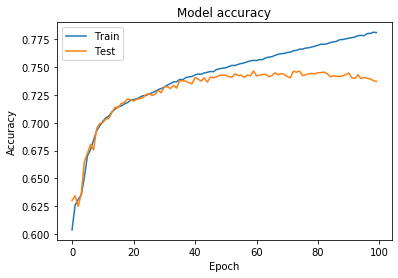

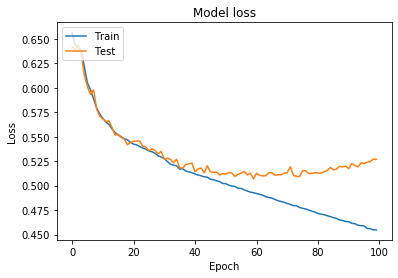

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Test

In [43]:

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform( test_set.iloc[:, 1:])

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[12],scaler.min_[12]))
multiplied_by = scaler.scale_[12]
added = scaler.min_[12]

scaled_test_df = pd.DataFrame(scaled_train, columns =  test_set.iloc[:, 1:].columns.values)

Note: median values were scaled by multiplying by 0.4514933346 and adding 0.000000


In [44]:
X_test = scaled_test_df.values
Y_test = test_set.iloc[:, 0].values

In [45]:
predictions = model.predict(X_test)

In [46]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("   Actuals: {}".format(Y_test))

Prediction: [0 0 0 ... 0 0 0]
   Actuals: [0. 0. 1. ... 0. 1. 0.]


## ROC Curves

In [38]:
from sklearn.metrics import roc_curve
predictions = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, predictions)

**Area Under the Curve Calculation**

In [39]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

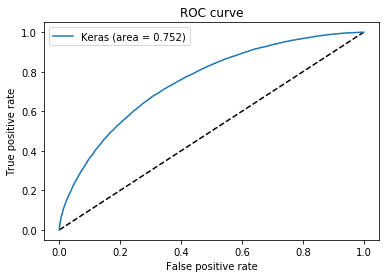

In [40]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [50]:
confMat=tf.math.confusion_matrix(
    Y_test,
    tf.argmax(predictions, axis=1),
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

In [53]:
print(tf.argmax(predictions, axis=1))

tf.Tensor([0 0 0 ... 0 0 0], shape=(50000,), dtype=int64)
